In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(380)

In [2]:
class Econ_agent:
	def __init__(self, id_number, budget):
		self.id_number = id_number
		self.budget = budget

	def introduce_me(self):
		print(f"Agent {self.id_number} has a budget of {self.budget}.")

In [3]:
class Consumer(Econ_agent):
	def __init__(self, id_number, budget, preference):
		super().__init__(id_number, budget)
		self.preference = preference
		self.wtp = self.budget * self.preference

	def buying(self, price):
		# they will purchase no more than 5 units?
		if self.wtp < price:
			return False
		else:
			return True

In [4]:
class Producer(Econ_agent):
	def __init__(self, id_number, budget, opp_cost):
		super().__init__(id_number, budget)
		self.opp_cost = opp_cost

	def selling(self, price):
		if self.opp_cost > price:
			return 0
		else:
			return math.floor(self.budget/self.opp_cost)

In [5]:
consumers = []
for i in range(200):
	budget = np.random.normal(500, 100)
	preference = random.uniform(0, 1)
	consumers.append(Consumer(i, budget, preference))
	
producers = []
for i in range(50):
	budget = np.random.uniform(1000, 2000)
	opp_cost = np.random.uniform(100, 200)
	producers.append(Producer(i, budget, opp_cost))

In [6]:
total_demand = float('inf')
total_supply = 0
price = -1

while abs(total_demand - total_supply) > 5:
    price += 1
    total_demand = sum(consumer.buying(price) for consumer in consumers)
    total_supply = sum(producer.selling(price) for producer in producers)
    
equilibrium_price = price
equilibrium_quantity = min(total_demand, total_supply)

print(f"Equilibrium Price: {equilibrium_price}")
print(f"Equilibrium Quantity: {equilibrium_quantity}")

Equilibrium Price: 116
Equilibrium Quantity: 150


In [7]:
def demand(consumers):
	demand_curve = [0] * 100
	for consumer in consumers:
		for price in range(100, 200):
			if consumer.buying(price):
				demand_curve[price-100] += (math.floor((consumer.preference*consumer.budget)/price))
			else:
				demand_curve[price-100] += 0
	return demand_curve

In [8]:
def supply(producers):
    supply_curve = [0] * 100
    # print(supply_curve)
    for price in range(100, 200):
        supply_curve[price - 100] = (sum(producer.selling(price) for producer in producers))
    return supply_curve

In [9]:
new_producers = []
for i in range(50):
	budget = np.random.uniform(1000, 2000)
	opp_cost = np.random.uniform(100, 200) * 0.95
	new_producers.append(Producer(i, budget, opp_cost))

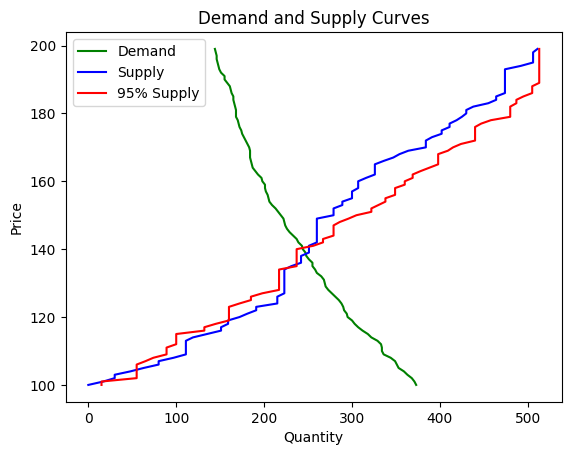

In [10]:
from numpy import linspace
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
demand = demand(consumers)
supply_95 = supply(new_producers)
supply = supply(producers)

# visualize the demand and supply, see if it makes sense
plt.plot(demand, range(100,200), 'g', label='Demand')
plt.plot(supply, range(100,200), 'b', label='Supply')
plt.plot(supply_95, range(100, 200), 'r', label='95% Supply')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand and Supply Curves')
plt.legend()
plt.show()